    """
    Description:
    
    Parameters:
    
    Return:
    """
    
    have a read me in the repository

In [16]:
import gaussxw
import math
import pylab as py
import numpy as np
import romberg as rm

%matplotlib inline

In [2]:
def hermitePolynomial (nValue, xValue):
    """
    Description: Calculates the nth Hermite polynomial for the given n-value at the given x-value
    
    Parameters: nValue - the nth Hermite polynomial to be calculated
                xValue - the independant variable where the Hermite polynomial will be determined
    
    Return: The value of the nth Hermite polynomial at the given x-value
    """
    
    hermiteCur = 2 * xValue
    hermitePrev = 1
    
    if 0 == nValue:
        hermiteCur = hermitePrev
    
    elif 1 < nValue:
        for i in range (2, nValue):
            hermiteNext = 2 * xValue * hermiteCur - 2 * i * hermitePrev
            hermitePrev = hermiteCur
            hermiteCur = hermiteNext
    
    return hermiteCur

In [3]:
def quantumWaveFunc (nValue, xValue):
    """
    Description: Calculates the wavefunction of the nth energy level of the one-dimensional quantum harmonic oscillator
    
    Parameters: nValue - the energy level being calculated
                xValue - the independant variable where the wavefunction is being evaluated
    
    Return: The value of the wavefunction for the nth energy level evaluated at the given x-value
    """
    
    return math.exp (-xValue**2 / 2) / (math.sqrt (2**nValue * math.factorial (nValue) * math.sqrt (math.pi))) * hermitePolynomial (nValue, xValue)

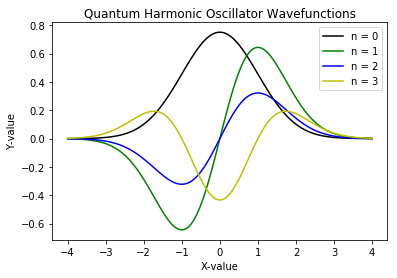

In [4]:
xLabel = "X-value"
yLabel = "Y-value"
title = "Quantum Harmonic Oscillator Wavefunctions"

numberOfDataPoints = 100
nValues = [0, 1, 2, 3]
x1 = -4
x2 =  4

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([len (nValues), numberOfDataPoints])

for i in range (len (nValues)):
    for j in range (len (xValues)):
        yValues[i][j] = quantumWaveFunc (nValues[i], xValues[j])

py.plot (xValues, yValues[0], 'k-', label = "n = 0")
py.plot (xValues, yValues[1], 'g-', label = "n = 1")
py.plot (xValues, yValues[2], 'b-', label = "n = 2")
py.plot (xValues, yValues[3], 'y-', label = "n = 3")
py.xlabel (xLabel)
py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

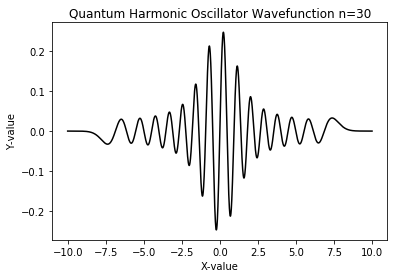

In [5]:
numberOfDataPoints = 10000

title = "Quantum Harmonic Oscillator Wavefunction n=30"

nValue = 30
x1 = -10
x2 =  10

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([numberOfDataPoints])

for j in range (len (xValues)):
    yValues[j] = quantumWaveFunc (nValue, xValues[j])

py.plot (xValues, yValues, 'k-')
py.xlabel (xLabel)
py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

In [38]:
def infIntTransformation (nValue, xValue):
    return quantumWaveFunc (nValue, math.tan (xValue)) 

def rootMeanFunc (nValue, xValue):
    return (math.tan (xValue))**2 * (abs (infIntTransformation (nValue, xValue)))**2 / (math.cos (xValue))**2


In [42]:

numSamplePoints = 100
x1 = -math.pi / 2
x2 = math.pi / 2
nValue = 5
integral = 0

x, w = gaussxw.gaussxw (numSamplePoints)



xp = 0.5 * (x2 - x1) * x + 0.5 * (x2 + x1)
wp = 0.5 * (x2 - x1) * w



for i in range (numSamplePoints):
#    integral += w[i] * (rootMeanFunc (nValue, -(x[i]**2) / (1 - x[i])**2)) / (1 - x[i])**2
    integral += wp[i] * rootMeanFunc (nValue, xp[i])

print (integral)
print (math.sqrt (integral))

[ 0.99971373  0.99849195  0.99629513  0.99312494  0.9889844   0.98387754
  0.97780936  0.97078578  0.96281365  0.95390078  0.94405587  0.93328854
  0.9216093   0.90902957  0.89556164  0.88121868  0.86601469  0.84996453
  0.83308388  0.81538924  0.79689789  0.77762791  0.75759812  0.73682809
  0.71533812  0.6931492   0.67028302  0.64676191  0.62260886  0.59784747
  0.57250193  0.54659701  0.52015802  0.49321079  0.46578165  0.4378974
  0.40958529  0.38087298  0.35178853  0.32236034  0.29261719  0.26258812
  0.23230248  0.20178986  0.17108008  0.14020314  0.1091892   0.07806858
  0.04687168  0.01562898 -0.01562898 -0.04687168 -0.07806858 -0.1091892
 -0.14020314 -0.17108008 -0.20178986 -0.23230248 -0.26258812 -0.29261719
 -0.32236034 -0.35178853 -0.38087298 -0.40958529 -0.4378974  -0.46578165
 -0.49321079 -0.52015802 -0.54659701 -0.57250193 -0.59784747 -0.62260886
 -0.64676191 -0.67028302 -0.6931492  -0.71533812 -0.73682809 -0.75759812
 -0.77762791 -0.79689789 -0.81538924 -0.83308388 -0.8

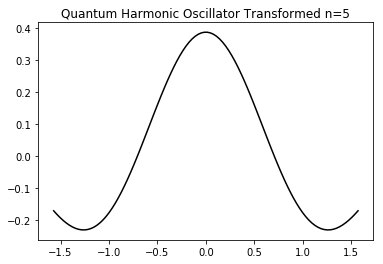

In [10]:
xLabel = "X-value"
yLabel = "Y-value"
title = "Quantum Harmonic Oscillator Transformed n=5"

numberOfDataPoints = 100
nValue = 5
x1 = -math.pi / 2
x2 =  math.pi / 2

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([numberOfDataPoints])

for j in range (len (xValues)):
    yValues[j] = quantumWaveFunc (nValue, xValues[j])

py.plot (xValues, yValues, 'k-')
#py.xlabel (xLabel)
#py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

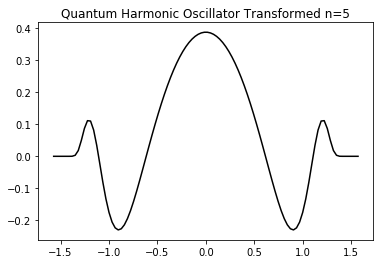

In [27]:
xLabel = "X-value"
yLabel = "Y-value"
title = "Quantum Harmonic Oscillator Transformed n=5"

numberOfDataPoints = 100
nValue = 5
x1 = -math.pi / 2
x2 =  math.pi / 2

xValues = np.linspace (x1, x2, numberOfDataPoints, endpoint = True)
yValues = np.empty ([numberOfDataPoints])

for j in range (len (xValues)):
    yValues[j] = infIntTransformation (nValue, xValues[j])

py.plot (xValues, yValues, 'k-')
#py.xlabel (xLabel)
#py.ylabel (yLabel)
py.title (title)

py.legend ()
py.show ()

In [7]:
help (rm.romberg)

Help on function romberg in module romberg:

romberg(f, interval, tolerance, verbose=False, min_order=0, max_order=None, reference=None)
    Evaluate integral by Romberg integration.
    
    Note: The Romberg extrapolation order is taken 0-based in the code
    and diagnostic output.  That is, R(i,0) is the trapezoidal rule
    with 2**i steps.  (In Newman the extrapolation order is taken
    1-based, instead.)
    
    f: function to integrate
    interval: tuple integration region (a,b)
    tolerance: desired absolute error
    verbose (optional):  controls diagnostic output
    min_order (optional): lowest order to carry to, regardless of tolerance
    max_order (optional): limit on order of calculation, giving failure (or None)
    reference (optional): reference value for comparison output (or None)



In [18]:
def rootMeanFuncN5 (xValue):
    nValue = 5
    return rootMeanFunc (nValue, xValue)

In [20]:
numSamplePoints = 100
x1 = -math.pi / 2
x2 = math.pi / 2
nValue = 5
integral = 0



integral = rm.romberg (rootMeanFuncN5, (x1, x2), 1)
print (integral)

0.0
